## Python data science tools for petroleum exploration and production: DIstance Correlation and Clustering

This notebook goes with the blog post: [Data exploration in Python: distance correlation and variable clustering](https://mycarta.wordpress.com/2019/04/10/data-exploration-in-python-distance-correlation-and-variable-clustering/).

#### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from biokit.viz import heatmap
import dcor
import copy

#### Data loading

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv')

In [3]:
data = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform', 'Production']]
data.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524,33.428571
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793,15.141909
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000,7.710000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000,22.670000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000,36.420000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000,44.200000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000,59.200000


#### Correlation matrix using distance correlation and p-value

Distance correlation from the [dcor library](https://github.com/vnmabus/dcor)

In [4]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]

    if pval:
        return (dc, pv)
    else:
        return dc

In [5]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = plt.gca()
    #ax.annotate("p-value = {:.5f}".format(p), xy=(.1, 0.998), xycoords=ax.transAxes, color = pclr, fontsize = 14)
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

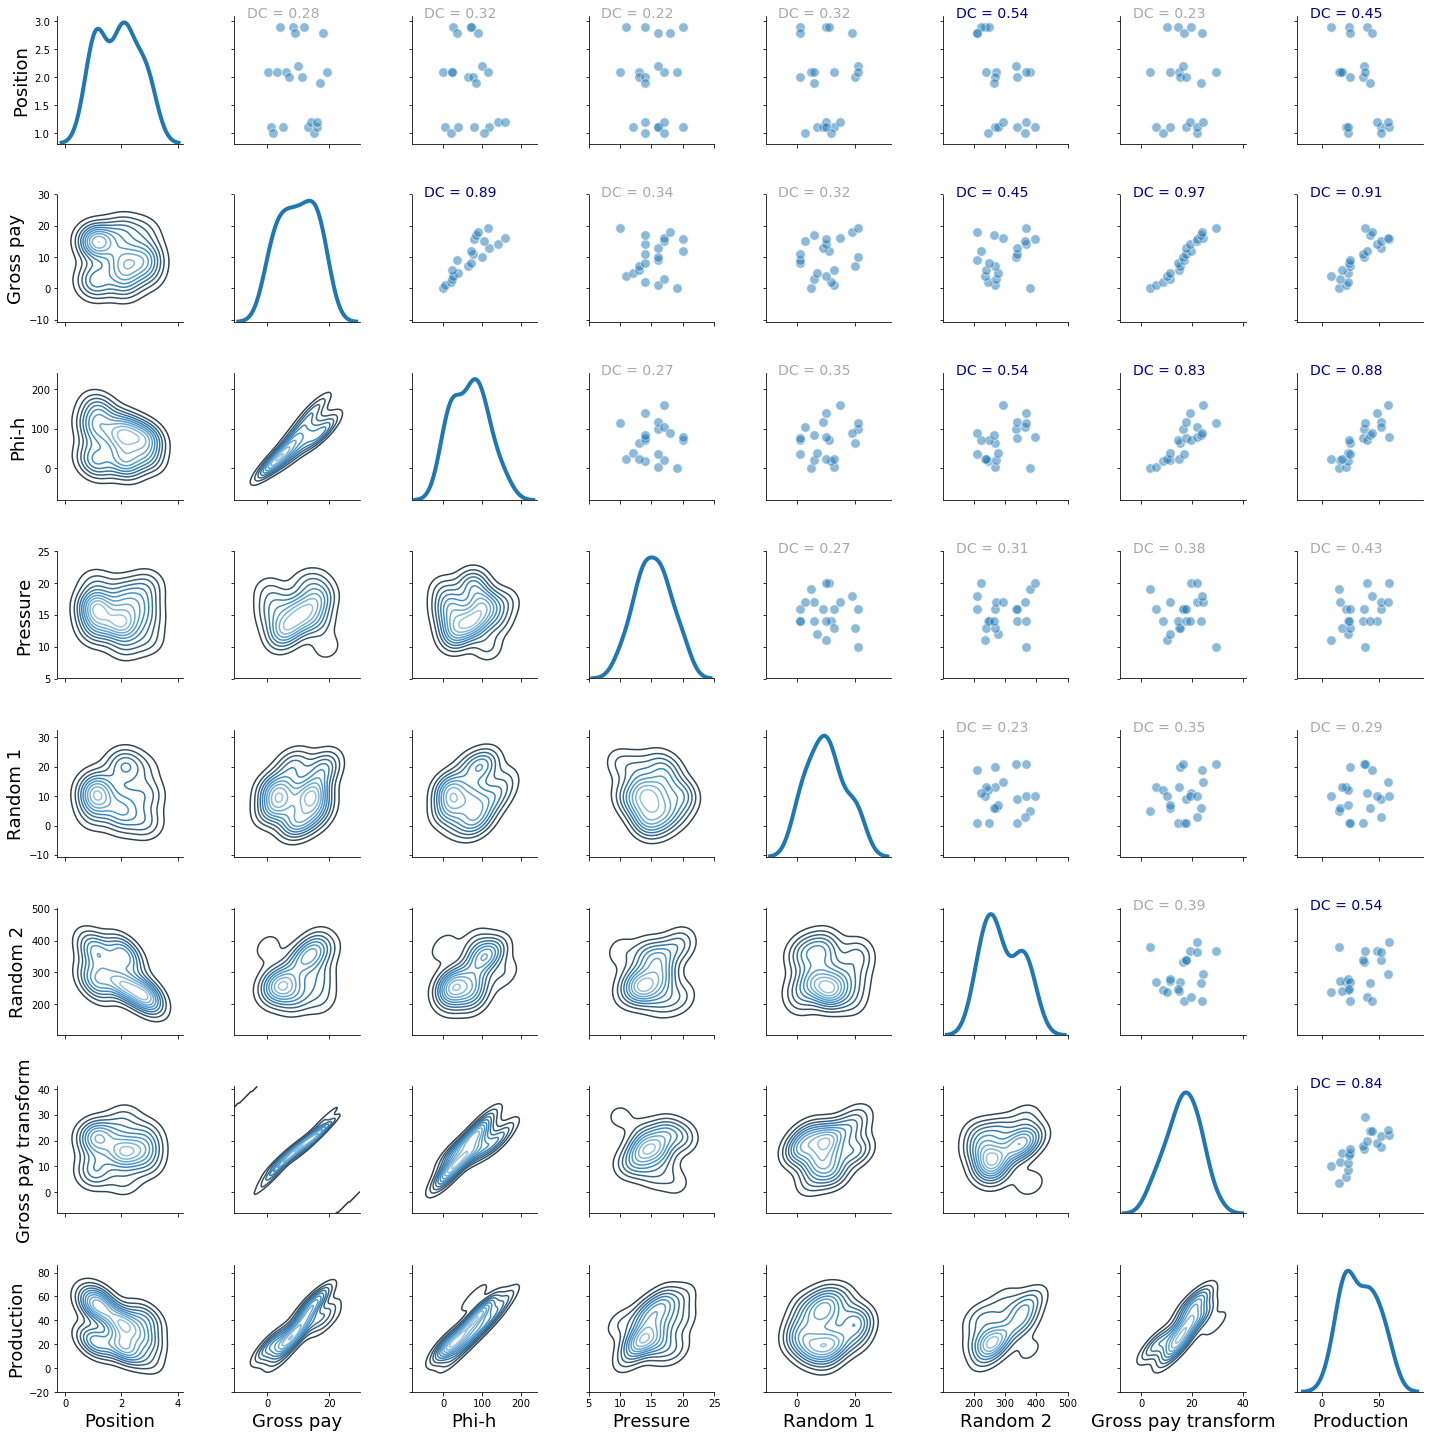

In [6]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter,  linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_final.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

#### Clustering, heatmap, etcetera

Distance correlation from the [dcor library](https://github.com/vnmabus/dcor) applied using a modification from [this SO answer on Euclidean distance](https://stackoverflow.com/a/29731899/1034648) to get a square matrix

In [7]:
data.rename(index=str, columns={"Gross pay transform": "Gross pay tr"}, inplace=True)
data.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay tr,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524,33.428571
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793,15.141909
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000,7.710000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000,22.670000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000,36.420000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000,44.200000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000,59.200000


In [8]:
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))
pd.options.display.float_format = '{:,.2f}'.format
rslt

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay tr,Production
Position,1.00,0.28,0.32,0.22,0.32,0.54,0.23,0.45
Gross pay,0.28,1.00,0.89,0.34,0.32,0.45,0.97,0.91
Phi-h,0.32,0.89,1.00,0.27,0.35,0.54,0.83,0.88
Pressure,0.22,0.34,0.27,1.00,0.27,0.31,0.38,0.43
Random 1,0.32,0.32,0.35,0.27,1.00,0.23,0.35,0.29
Random 2,0.54,0.45,0.54,0.31,0.23,1.00,0.39,0.54
Gross pay tr,0.23,0.97,0.83,0.38,0.35,0.39,1.00,0.84
Production,0.45,0.91,0.88,0.43,0.29,0.54,0.84,1.00


Test a few values individually

In [9]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], 
                                                                        data['Phi-h'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], 
                                                                        data['Position'])))

distance correlation = 0.88
distance correlation = 0.45


##### Biokit heatmap with dendrograms, passing the distance correlation matrix isntead of raw data

In [10]:
font = {'size'  : 22}
plt.rc('font', **font)

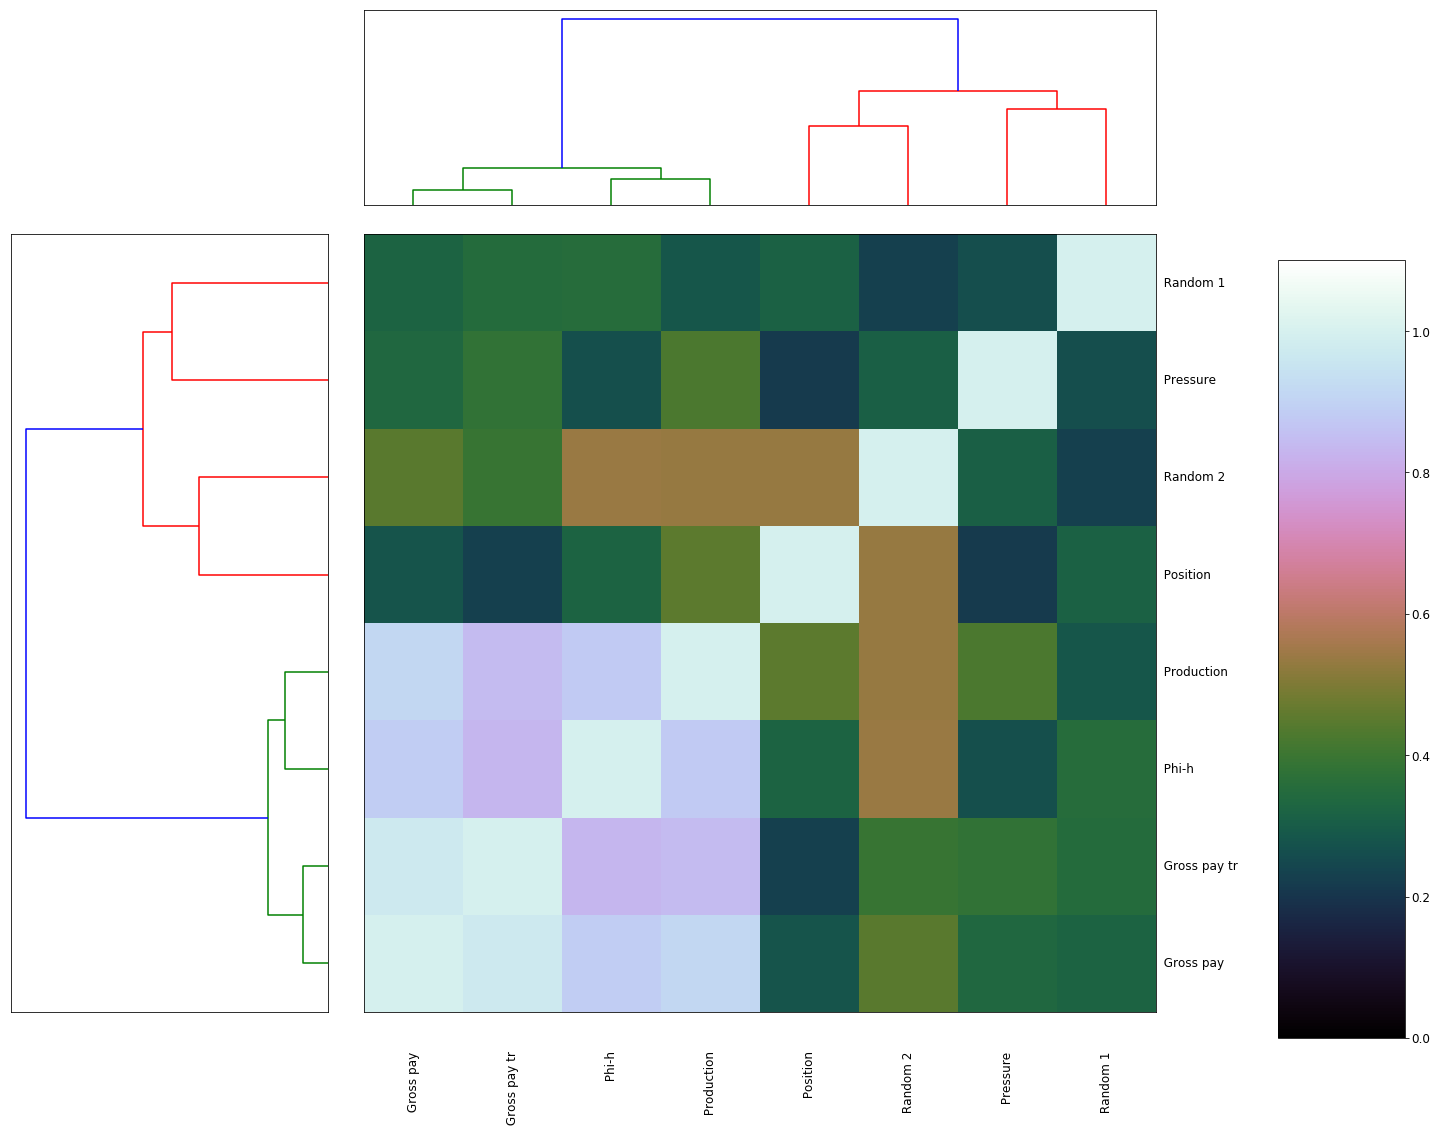

In [11]:
h = heatmap.Heatmap(rslt)
h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
fig = plt.gcf()
fig.set_size_inches(22, 18)
plt.gcf().get_axes()[1].invert_xaxis();
#plt.gcf().get_axes()[1].invert_yaxis()
#plt.gcf().get_axes()[2].invert_yaxis()
#plt.savefig('biokit_heatmap_final', dpi=300, bbox_inches='tight', pad_inches=0.2);

##### SEABORN clustermap passing the distance correlation matrix isntead of raw data

In [12]:
data.rename(index=str, columns={"Gross pay tr": "Gross pay transform"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))
pd.options.display.float_format = '{:,.2f}'.format
rslt

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform,Production
Position,1.00,0.28,0.32,0.22,0.32,0.54,0.23,0.45
Gross pay,0.28,1.00,0.89,0.34,0.32,0.45,0.97,0.91
Phi-h,0.32,0.89,1.00,0.27,0.35,0.54,0.83,0.88
Pressure,0.22,0.34,0.27,1.00,0.27,0.31,0.38,0.43
Random 1,0.32,0.32,0.35,0.27,1.00,0.23,0.35,0.29
Random 2,0.54,0.45,0.54,0.31,0.23,1.00,0.39,0.54
Gross pay transform,0.23,0.97,0.83,0.38,0.35,0.39,1.00,0.84
Production,0.45,0.91,0.88,0.43,0.29,0.54,0.84,1.00


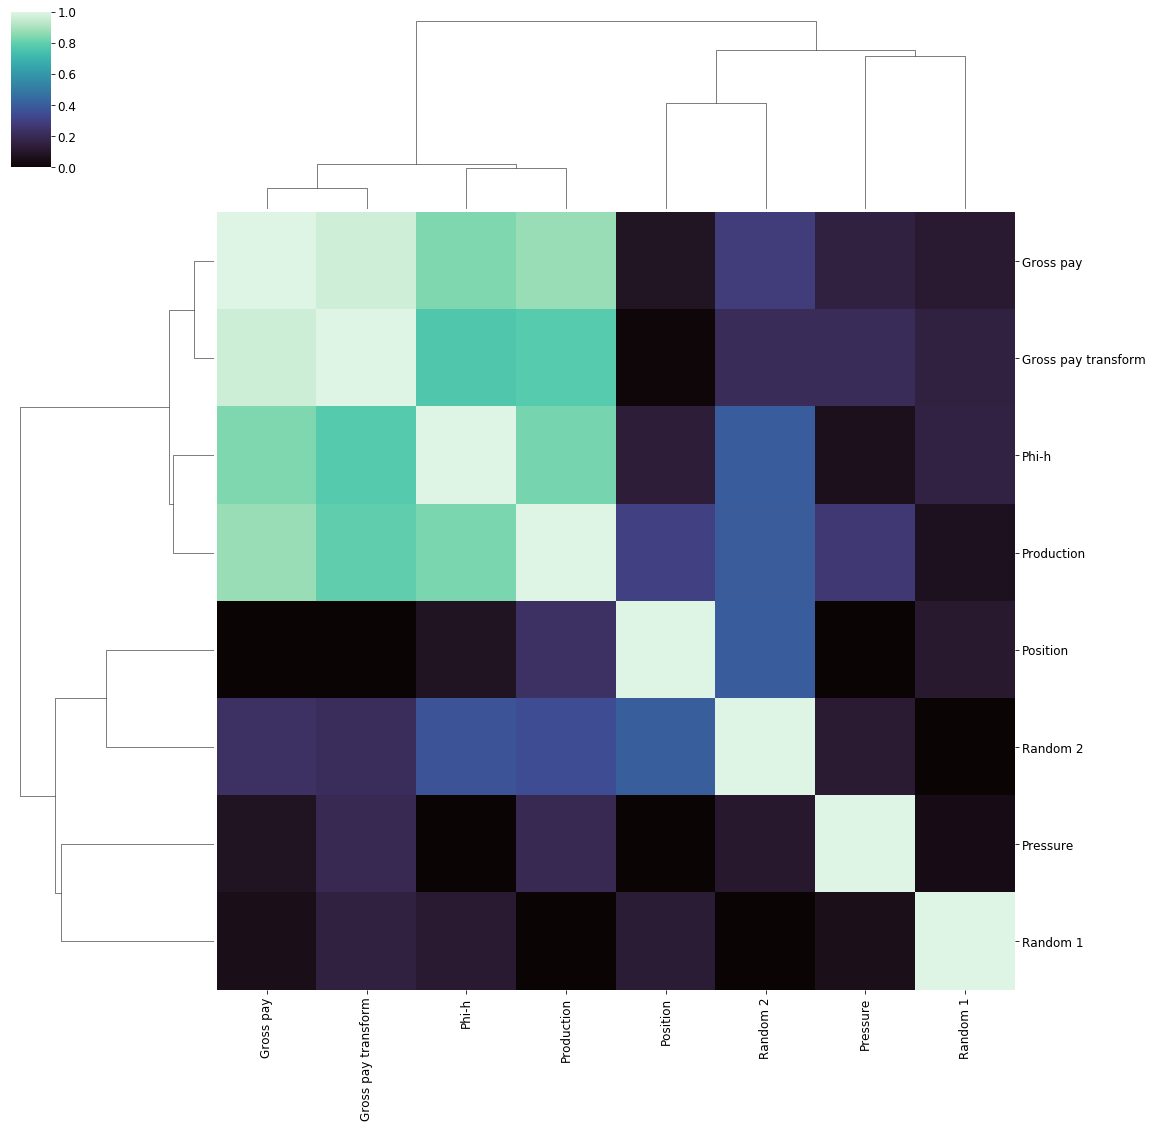

In [13]:
g = sns.clustermap(rslt, cmap="mako", standard_scale =1) 
fig = plt.gcf()
fig.set_size_inches(18, 18)
#plt.gcf().get_axes()[2].invert_yaxis();
#plt.savefig('seaborn_heatmap_final', dpi=300, bbox_inches='tight', pad_inches=0.2)

##### Access indices of the input matrix, reordered by the dendrogram, and use it to reorder correlation matrix

See: https://github.com/mwaskom/seaborn/issues/1207#issuecomment-424920950

In [14]:
# help(g.dendrogram_col)

In [15]:
a = g.dendrogram_col.reordered_ind
print(a)

[1, 6, 2, 7, 0, 5, 3, 4]


In [16]:
b = list(data)
print (b)

['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform', 'Production']


In [17]:
data = data[[b[i] for i in a]]
print(list(data))

['Gross pay', 'Gross pay transform', 'Phi-h', 'Production', 'Position', 'Random 2', 'Pressure', 'Random 1']


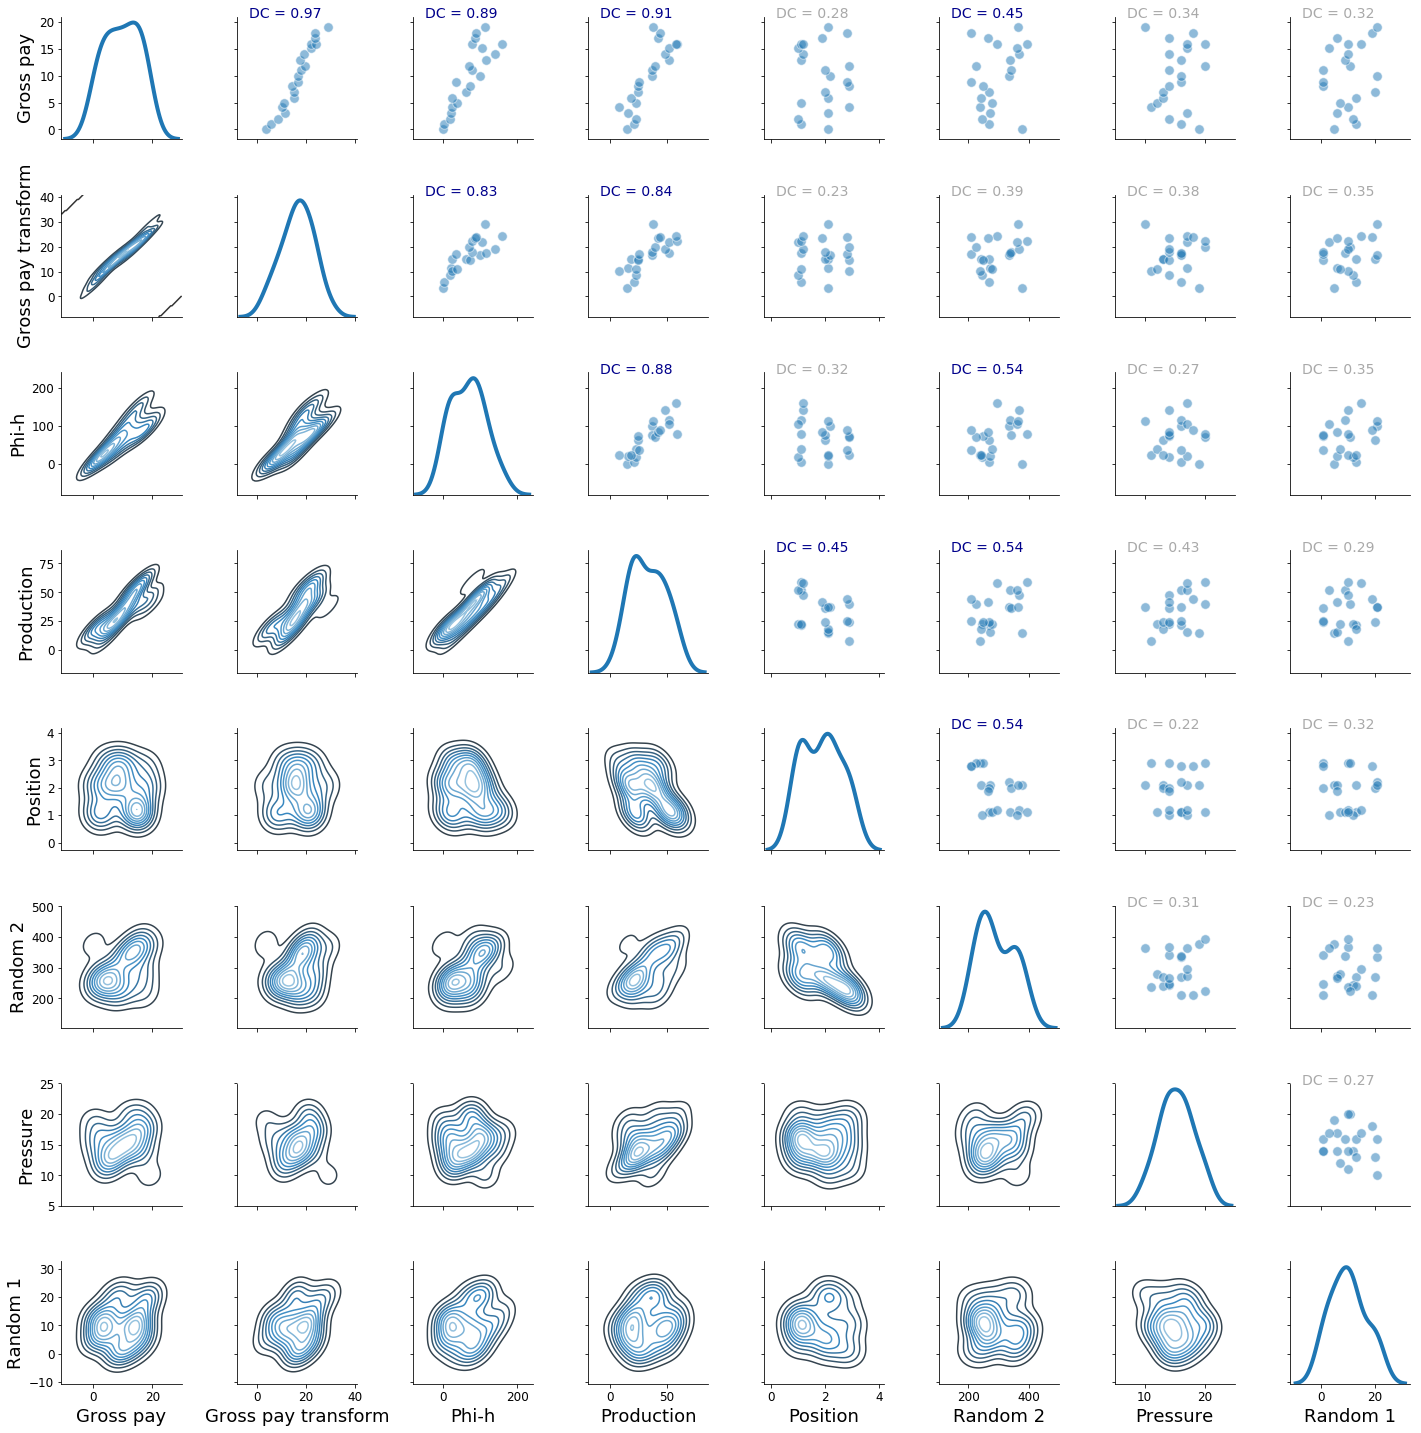

In [18]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_sorted.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()